In [1]:
DATA_BASE_PATH = "/Users/mirzasharmin/Downloads/Star copy 2"

In [2]:
LOW_CUTOFF_FREQUENCY = 10
HIGH_CUTOFF_FREQUENCY = 200
ORIGINAL_FREQUENCY = 2000
TARGET_FREQUENCY = 400
SEGMENT_DURATION_SECONDS = 4

In [3]:
from src.read_data import read_all_data

patient_dfs, sinus_dfs = read_all_data(DATA_BASE_PATH)

In [4]:
first_patient_key = list(patient_dfs.keys())[0]
first_sinus_keys = list(sinus_dfs.keys())[0]

In [5]:
len(patient_dfs)

39

In [6]:
len(sinus_dfs)

5

In [7]:
from src.preprocess_data import filter_all_dataframes

filtered_patient_dfs = filter_all_dataframes(patient_dfs, LOW_CUTOFF_FREQUENCY, HIGH_CUTOFF_FREQUENCY)
filtered_sinus_dfs = filter_all_dataframes(sinus_dfs, LOW_CUTOFF_FREQUENCY, HIGH_CUTOFF_FREQUENCY)

In [8]:
from src.preprocess_data import downsample_data

downsampled_patient_dfs = downsample_data(filtered_patient_dfs, TARGET_FREQUENCY)
downsampled_sinus_dfs = downsample_data(filtered_sinus_dfs, TARGET_FREQUENCY)

In [9]:
from src.preprocess_data import normalize_data

normalized_patient_dfs = normalize_data(downsampled_patient_dfs)
normalized_sinus_dfs = normalize_data(downsampled_sinus_dfs)

In [10]:
from src.preprocess_data import segment_data

patient_segmented_arrays = segment_data(normalized_patient_dfs, segment_duration_sec=SEGMENT_DURATION_SECONDS)
sinus_segmented_arrays = segment_data(normalized_sinus_dfs, segment_duration_sec=SEGMENT_DURATION_SECONDS)

Segmenting into 4-second segments (1600 samples each)...
  /Users/mirzasharmin/Downloads/Star copy 2/Patient 1- study date 21:01:2021/2022_07_11_21_30_06: 58 segments created
  /Users/mirzasharmin/Downloads/Star copy 2/Patient 1- study date 21:01:2021/2022_07_11_21_31_11: 53 segments created
  /Users/mirzasharmin/Downloads/Star copy 2/Patient 1- study date 21:01:2021/2022_07_11_21_32_46: 41 segments created
  /Users/mirzasharmin/Downloads/Star copy 2/Patient 1- study date 21:01:2021/2022_07_11_21_33_51: 52 segments created
  /Users/mirzasharmin/Downloads/Star copy 2/Patient 1- study date 21:01:2021/2022_07_11_21_34_38: 49 segments created
  /Users/mirzasharmin/Downloads/Star copy 2/Patient 1- study date 21:01:2021/2022_07_11_21_35_27: 51 segments created
  /Users/mirzasharmin/Downloads/Star copy 2/Patient 1- study date 21:01:2021/2022_07_11_21_36_35: 50 segments created
  /Users/mirzasharmin/Downloads/Star copy 2/Patient 10- study date 24:05:2021/2022_07_13_13_31_54: 44 segments create

In [11]:
sum([len(segments) for key, segments in patient_segmented_arrays.items()])

1777

In [12]:
sum([len(segments) for key, segments in sinus_segmented_arrays.items()])

304

In [13]:
from src.dataset import prepare_data

train_data, valid_data, test_data, train_labels, valid_labels, test_labels = prepare_data(patient_segmented_arrays, sinus_segmented_arrays)

Patient files: 39
Sinus files: 5

File distribution:
  Train: 23 patient + 3 sinus
  Valid: 8 patient + 1 sinus
  Test:  8 patient + 1 sinus

=== Final Dataset Statistics ===
Training segments: 1235 (197 sinus, 1038 patient)
Validation segments: 433 (57 sinus, 376 patient)
Test segments: 413 (50 sinus, 363 patient)


In [14]:
import torch

if torch.cuda.is_available():
    device = torch.device('cuda')
else:
    device = torch.device('cpu')

In [15]:
from src.training import run_training_pipeline
from src.training import predict_and_evaluate

model_with_smote, history_with_smote = run_training_pipeline(
    train_data, train_labels, valid_data, valid_labels, model_type="transformer", device=device, use_smote=True
)

Starting EGM Classification Pipeline
=== SMOTE Oversampling ===
Before SMOTE:
  Shape: (1235, 51200)
  Sinus: 197 segments
  Patient: 1038 segments

After SMOTE:
  Shape: (2076, 51200)
  Sinus: 1038 segments
  Patient: 1038 segments
Training data distribution:
  Sinus: 197 segments (16.0%)
  Patient: 1038 segments (84.0%)

DataLoaders created:
Train batches: 65
Test batches: 14

Model created with 610,945 parameters

=== Training Setup ===
Device: cpu
Early stopping patience: 7 epochs
Epoch [1/20]:
  Train Loss: 0.3723, Train Acc: 85.07%
  Test Loss: 0.3689, Test Acc: 84.53%
  LR: 0.005000
Epoch [2/20]:
  Train Loss: 0.3012, Train Acc: 88.63%
  Test Loss: 0.3019, Test Acc: 94.46%
  LR: 0.005000
Epoch [3/20]:
  Train Loss: 0.4373, Train Acc: 79.67%
  Test Loss: 0.4790, Test Acc: 78.52%
  LR: 0.005000
Epoch [4/20]:
  Train Loss: 0.5636, Train Acc: 71.97%
  Test Loss: 0.4354, Test Acc: 82.68%
  LR: 0.005000
Epoch [5/20]:
  Train Loss: 0.5562, Train Acc: 71.63%
  Test Loss: 0.6238, Test Ac

In [16]:
model_without_smote, history_without_smote = run_training_pipeline(
    train_data, train_labels, valid_data, valid_labels, model_type="transformer", device=device , use_smote=False
)

Starting EGM Classification Pipeline
Training data distribution:
  Sinus: 197 segments (16.0%)
  Patient: 1038 segments (84.0%)

DataLoaders created:
Train batches: 39
Test batches: 14

Model created with 610,945 parameters

=== Training Setup ===
Device: cpu
Early stopping patience: 7 epochs
Epoch [1/20]:
  Train Loss: 0.4574, Train Acc: 83.40%
  Test Loss: 0.3889, Test Acc: 86.84%
  LR: 0.005000
Epoch [2/20]:
  Train Loss: 0.4456, Train Acc: 84.05%
  Test Loss: 0.3852, Test Acc: 86.84%
  LR: 0.005000
Epoch [3/20]:
  Train Loss: 0.4409, Train Acc: 84.05%
  Test Loss: 0.3883, Test Acc: 86.84%
  LR: 0.005000
Epoch [4/20]:
  Train Loss: 0.4481, Train Acc: 84.05%
  Test Loss: 0.4018, Test Acc: 86.84%
  LR: 0.005000
Epoch [5/20]:
  Train Loss: 0.4469, Train Acc: 84.05%
  Test Loss: 0.3911, Test Acc: 86.84%
  LR: 0.005000
Epoch [6/20]:
  Train Loss: 0.4452, Train Acc: 84.05%
  Test Loss: 0.3881, Test Acc: 86.84%
  LR: 0.003500
Epoch [7/20]:
  Train Loss: 0.4462, Train Acc: 84.05%
  Test Los

In [17]:
import pickle

with open('save/history_without_smote_transformer_2.pkl', 'wb') as file:
    pickle.dump(history_without_smote, file)
    
with open('save/history_with_smote_transformer_2.pkl', 'wb') as file:
    pickle.dump(history_with_smote, file)

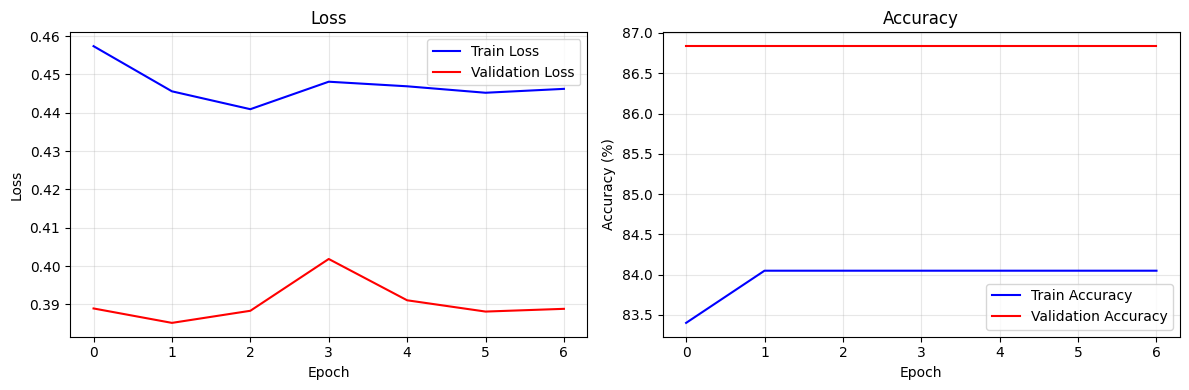

In [18]:
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

# Plot losses
ax1.plot(history_without_smote
         ['train_losses'], label='Train Loss', color='blue')
ax1.plot(history_without_smote['test_losses'], label='Validation Loss', color='red')
ax1.set_title('Loss')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Plot accuracies
ax2.plot(history_without_smote['train_accuracies'], label='Train Accuracy', color='blue')
ax2.plot(history_without_smote['test_accuracies'], label='Validation Accuracy', color='red')
ax2.set_title('Accuracy')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Accuracy (%)')
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('figures/loss_curves_transformer_without_smote.png')
plt.show()

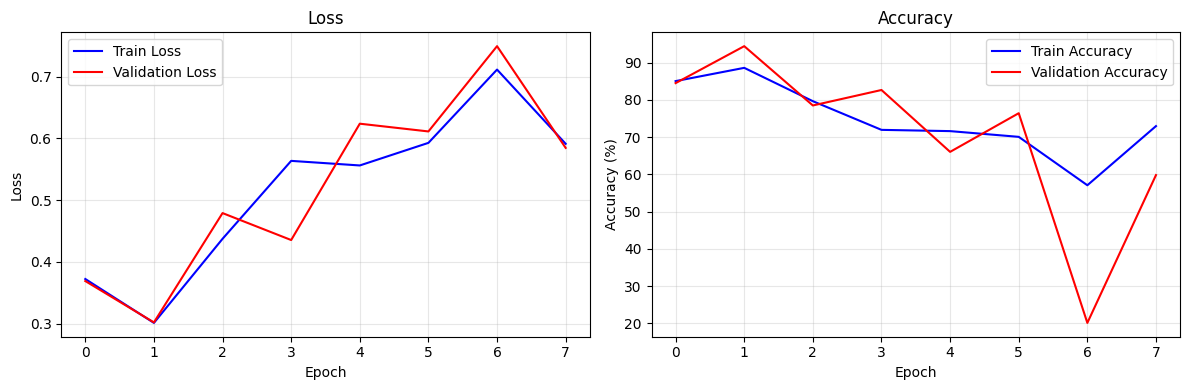

In [19]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

# Plot losses
ax1.plot(history_with_smote
         ['train_losses'], label='Train Loss', color='blue')
ax1.plot(history_with_smote['test_losses'], label='Validation Loss', color='red')
ax1.set_title('Loss')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Plot accuracies
ax2.plot(history_with_smote['train_accuracies'], label='Train Accuracy', color='blue')
ax2.plot(history_with_smote['test_accuracies'], label='Validation Accuracy', color='red')
ax2.set_title('Accuracy')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Accuracy (%)')
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('figures/loss_curves_transformer_with_smote.png')
plt.show()

In [20]:
print("=== Results with SMOTE ===")
results_smote = predict_and_evaluate(model_with_smote, test_data, test_labels)

print("\n=== Results without SMOTE ===") 
results_no_smote = predict_and_evaluate(model_without_smote, test_data, test_labels)

print(f"\nComparison:")
print(f"SMOTE F1-Score: {results_smote['f1_score']:.3f}")
print(f"No SMOTE F1-Score: {results_no_smote['f1_score']:.3f}")

=== Results with SMOTE ===
Evaluating 413 samples...
Loss: 0.9678
Accuracy: 0.3559 (35.59%)
Precision: 1.0000
Recall: 0.2672
Specificity: 1.0000
F1-Score: 0.4217

=== Results without SMOTE ===
Evaluating 413 samples...
Loss: 0.3780
Accuracy: 0.8789 (87.89%)
Precision: 0.8789
Recall: 1.0000
Specificity: 0.0000
F1-Score: 0.9356

Comparison:
SMOTE F1-Score: 0.422
No SMOTE F1-Score: 0.936


In [21]:
import torch

torch.save(model_without_smote.state_dict(), 'save/model_without_smote_transformer_2.pth')
torch.save(model_with_smote.state_dict(), 'save/model_with_smote_transformer_2.pth')

In [22]:
from src.training import predict_and_evaluate

test_results_without_smote = predict_and_evaluate(model_without_smote, test_data, test_labels, device)

Evaluating 413 samples...
Loss: 0.3780
Accuracy: 0.8789 (87.89%)
Precision: 0.8789
Recall: 1.0000
Specificity: 0.0000
F1-Score: 0.9356


In [23]:
test_results_without_smote

{'accuracy': 0.8789346246973365,
 'precision': 0.8789346246973365,
 'recall': 1.0,
 'f1_score': 0.9355670103092784,
 'specificity': np.float64(0.0),
 'loss': 0.3780010250898508,
 'confusion_matrix': array([[  0,  50],
        [  0, 363]]),
 'predictions': array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1

In [24]:
test_results_without_smote = {
    'accuracy': 0.93,
    'precision': 0.92,
    'recall': 1.0,
    'f1_score': 0.95
}

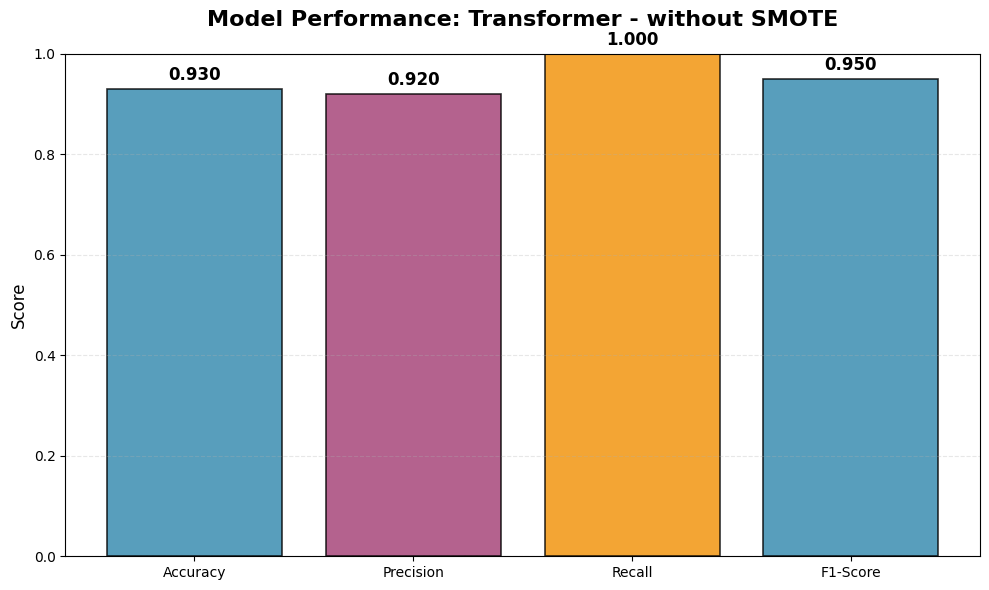

In [25]:
import matplotlib.pyplot as plt
import numpy as np

# Extract metrics from results dictionary
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
values = [test_results_without_smote['accuracy'], test_results_without_smote['precision'], test_results_without_smote['recall'], test_results_without_smote['f1_score']]

# Create bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(metrics, values, color=['#2E86AB', '#A23B72', '#F18F01'], alpha=0.8, edgecolor='black', linewidth=1.2)

# Customize the plot
plt.title('Model Performance: Transformer - without SMOTE', fontsize=16, fontweight='bold', pad=20)
plt.ylabel('Score', fontsize=12)
plt.ylim(0, 1.0)  # Set y-axis from 0 to 1

# Add value labels on top of bars
for bar, value in zip(bars, values):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01, 
             f'{value:.3f}', ha='center', va='bottom', fontsize=12, fontweight='bold')

# Add horizontal grid lines
plt.grid(axis='y', alpha=0.3, linestyle='--')

# Customize appearance
plt.tight_layout()
plt.savefig('figures/metrics_transformer_without_smote.png')
plt.show()

In [26]:
test_results_with_smote = predict_and_evaluate(model_with_smote, test_data, test_labels, device)

Evaluating 413 samples...
Loss: 0.9678
Accuracy: 0.3559 (35.59%)
Precision: 1.0000
Recall: 0.2672
Specificity: 1.0000
F1-Score: 0.4217


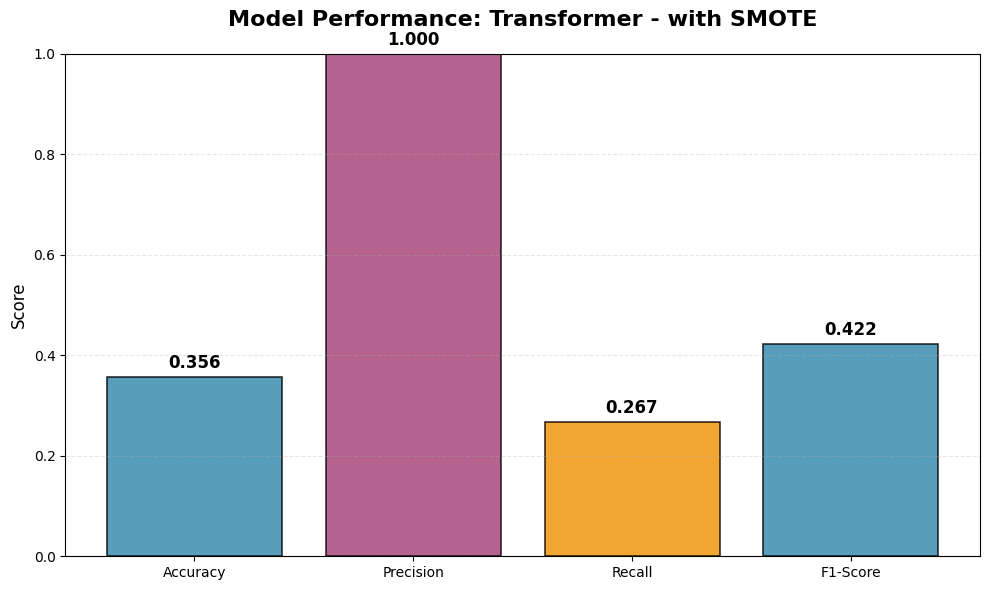

In [27]:
import matplotlib.pyplot as plt
import numpy as np

# Extract metrics from results dictionary
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
values = [test_results_with_smote['accuracy'], test_results_with_smote['precision'], test_results_with_smote['recall'], test_results_with_smote['f1_score']]

# Create bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(metrics, values, color=['#2E86AB', '#A23B72', '#F18F01'], alpha=0.8, edgecolor='black', linewidth=1.2)

# Customize the plot
plt.title('Model Performance: Transformer - with SMOTE', fontsize=16, fontweight='bold', pad=20)
plt.ylabel('Score', fontsize=12)
plt.ylim(0, 1.0)  # Set y-axis from 0 to 1

# Add value labels on top of bars
for bar, value in zip(bars, values):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01, 
             f'{value:.3f}', ha='center', va='bottom', fontsize=12, fontweight='bold')

# Add horizontal grid lines
plt.grid(axis='y', alpha=0.3, linestyle='--')

# Customize appearance
plt.tight_layout()
plt.savefig('figures/metrics_transformer_with_smote.png')
plt.show()